In [84]:
import numpy as np
import matplotlib.pyplot as plt

تعریف تابع 

In [85]:
def quadratic_function(x):
    return x**2

تولید مقادیر ورودی و خروجی برای آموزش مدل

In [86]:
np.random.seed(42)
X_train = np.random.uniform(-3, 3, 300).reshape(-1, 1)
y_train = quadratic_function(X_train)
X_train_normalized = (X_train - np.mean(X_train)) / np.std(X_train)

مقداردهی اولیه وزن ها

In [87]:
def initialize_weights(input_layer, hidden_layer_number, output_layer):
    input_layer_weights = np.random.randn(input_layer, hidden_layer_number)*0.01
    hidden_layer_weights = np.random.randn(hidden_layer_number, output_layer)*0.01
    return input_layer_weights, hidden_layer_weights

مقداردهی اولیه بایاس ها

In [88]:
def initialize_biases(hidden_layer_number, output_layer):
    hidden_layer_biases = np.zeros((1, hidden_layer_number))
    output_layer_biases = np.zeros((1, output_layer))
    return hidden_layer_biases, output_layer_biases

پیاده سازی تابع MLP

In [89]:
def MLP(input_layer=1, hidden_layer_neuron=10, output_layer=1, learning_rate=0.001, number_of_epochs=5000):
    input_layer_weights, hidden_layer_weights = initialize_weights(input_layer, hidden_layer_neuron, output_layer)
    hidden_layer_biases, output_layer_biases = initialize_biases(hidden_layer_neuron, output_layer)

    for epoch in range(number_of_epochs):
        # forward propagate
        hidden_layer_input = np.dot(X_train_normalized, input_layer_weights) + hidden_layer_biases

         # ReLU activation function
        hidden_layer_output = np.maximum(0, hidden_layer_input) 
        
        output_layer_input = np.dot(hidden_layer_output, hidden_layer_weights) + output_layer_biases
        predicted_output = output_layer_input

        # claculate loss with root mean square 
        loss = np.mean((predicted_output - y_train)**2)

        # claculate errors
        output_error = predicted_output - y_train
        hidden_error = np.dot(output_error, hidden_layer_weights.T)
        hidden_layer_delta = (hidden_layer_output > 0) * hidden_error

        # back propagation
        hidden_layer_weights -= learning_rate * np.dot(hidden_layer_output.T, output_error)
        output_layer_biases -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
        input_layer_weights -= learning_rate * np.dot(X_train_normalized.T, hidden_layer_delta)
        hidden_layer_biases -= learning_rate * np.sum(hidden_layer_delta, axis=0, keepdims=True)

        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    X_test = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_test_normalized = (X_test - np.mean(X_test)) / np.std(X_test)
    hidden_layer_input_test = np.dot(X_test_normalized, input_layer_weights) + hidden_layer_biases
    hidden_layer_output_test = np.maximum(0, hidden_layer_input_test)
    predicted_output_test = np.dot(hidden_layer_output_test, hidden_layer_weights) + output_layer_biases
    return X_test, predicted_output_test

نمایش خروجی ها

Epoch 0, Loss: 16.728916949515195
Epoch 1000, Loss: 0.04165133224147601
Epoch 2000, Loss: 0.014970527937391634
Epoch 3000, Loss: 0.009071713104037305
Epoch 4000, Loss: 0.0046045614823887705


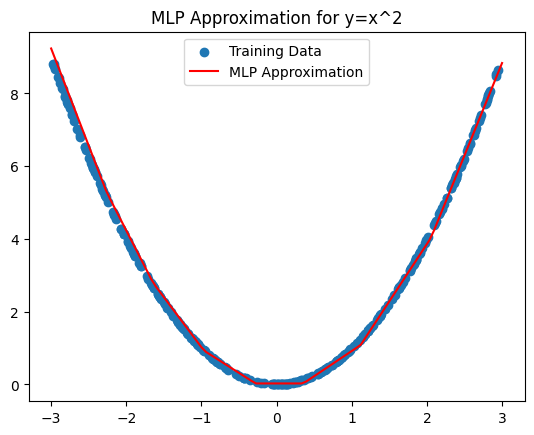

In [90]:
X_test, predicted_output_test = MLP()
plt.scatter(X_train, y_train, label='Training Data')
plt.plot(X_test, predicted_output_test, label='MLP Approximation', color='r')
plt.title('MLP Approximation for y=x^2')
plt.legend()
plt.show()